In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import KMeans
from scipy.stats import poisson

### We have 5 datasets :
<ul>
<li><strong>Clean_life_expectancy :</strong> The provided dataset for life expectancy, cleaned and updated </li>
<li><strong>Clean_life_expectancy_Melt :</strong> Contains the same info that clean_life_expectancy but with the years columns  melting into rows
<li><strong>Clean_fertility :</strong> The provided dataset for Fertility, cleaned and updated </li>
<li><strong>Clean_fertility_Melt :</strong> Contains the same info that Clean_fertility but with the years columns melting into rows </li>
<li><strong>metadata :</strong> Special dataset that contains information that link the country with regions an incomes types</li>
</ul>

In [2]:
life = pd.read_csv("Clean_life_expectancy.csv", encoding='cp1252')
life_melt=pd.read_csv("Clean_life_expectancy_Melt.csv", encoding='cp1252')
fertility = pd.read_csv("Clean_fertility.csv", encoding='cp1252')
fertility_melt = pd.read_csv("Clean_fertility_Melt.csv", encoding='cp1252')
metadata = pd.read_csv("metadata.csv", encoding='cp1252')

## Quick Inspection of the datasets 

In [3]:
life.head()

,Country_Name,Country_Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,...,73.968561,74.090854,74.228073,74.375707,74.526244,74.674220,74.816146,74.952024,75.080390,75.206756
1,Afghanistan,AFG,31.580049,32.095976,32.611878,33.127317,33.641244,34.153683,34.663122,35.170073,...,56.107561,56.569732,57.058439,57.570659,58.091366,58.607098,59.112341,59.600098,60.065366,60.509122
2,Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,...,47.393171,48.003512,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000
3,Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,...,75.529366,75.839000,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463
4,Arab_World,ARB,46.762695,47.388601,48.002436,48.607591,49.205118,49.791405,50.358954,50.905413,...,68.228091,68.410628,68.595946,68.794176,68.993647,69.187939,69.381597,69.571690,69.761465,69.949702


In [4]:
life_melt.head()

,Country_Name,Country_Code,Year,Life_Expectancy
0,Afghanistan,AFG,1960,31.580049
1,Afghanistan,AFG,1961,32.095976
2,Afghanistan,AFG,1962,32.611878
3,Afghanistan,AFG,1963,33.127317
4,Afghanistan,AFG,1964,33.641244


In [5]:
fertility.head()

,Country_Name,Country_Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,4.820000,4.655000,4.47100,4.271000,4.059000,3.842000,3.625000,3.417000,...,1.805000,1.786000,1.7690,1.75400,1.739000,1.726000,1.713000,1.701000,1.690000,1.681000
1,Afghanistan,AFG,7.671000,7.671000,7.67100,7.671000,7.671000,7.671000,7.671000,7.671000,...,7.321000,7.136000,6.9300,6.70200,6.456000,6.196000,5.928000,5.659000,5.395000,5.141000
2,Angola,AGO,7.316000,7.354000,7.38500,7.410000,7.425000,7.430000,7.422000,7.403000,...,6.743000,6.704000,6.6570,6.59800,6.523000,6.434000,6.331000,6.218000,6.099000,5.979000
3,Albania,ALB,6.186000,6.076000,5.95600,5.833000,5.711000,5.594000,5.483000,5.376000,...,2.097000,2.004000,1.9190,1.84900,1.796000,1.761000,1.744000,1.741000,1.748000,1.760000
4,Arab_World,ARB,6.934798,6.949522,6.96061,6.966263,6.964606,6.954039,6.933182,6.902797,...,3.583504,3.523238,3.4731,3.42935,3.391454,3.357522,3.325365,3.297409,3.266215,3.233402


In [6]:
fertility_melt.head()


,Country_Name,Country_Code,Year,Fertility
0,Afghanistan,AFG,1960,7.671
1,Afghanistan,AFG,1961,7.671
2,Afghanistan,AFG,1962,7.671
3,Afghanistan,AFG,1963,7.671
4,Afghanistan,AFG,1964,7.671


In [7]:
metadata.head()


,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra


## Merging life_expectancy, fertility and metadata datasets

In [8]:
merge_life_fertility = pd.merge(life_melt,fertility_melt, left_on=["Country_Name","Country_Code","Year"], right_on=["Country_Name","Country_Code","Year"])
merge_life_fertility.head()

,Country_Name,Country_Code,Year,Life_Expectancy,Fertility
0,Afghanistan,AFG,1960,31.580049,7.671
1,Afghanistan,AFG,1961,32.095976,7.671
2,Afghanistan,AFG,1962,32.611878,7.671
3,Afghanistan,AFG,1963,33.127317,7.671
4,Afghanistan,AFG,1964,33.641244,7.671


## By region and income

In [9]:
df_merge_fertility_income = pd.merge(life_melt,fertility_melt, left_on=["Country_Name","Country_Code","Year"], right_on=["Country_Name","Country_Code","Year"])
df_merge_region_income = pd.merge(df_merge_fertility_income,metadata,left_on=["Country_Code","Country_Name"], right_on=["Country Code","TableName"])
del df_merge_region_income["TableName"]
del df_merge_region_income["Country Code"]
df_merge_region_income.head()

,Country_Name,Country_Code,Year,Life_Expectancy,Fertility,Region,IncomeGroup
0,Afghanistan,AFG,1960,31.580049,7.671,South Asia,Low income
1,Afghanistan,AFG,1961,32.095976,7.671,South Asia,Low income
2,Afghanistan,AFG,1962,32.611878,7.671,South Asia,Low income
3,Afghanistan,AFG,1963,33.127317,7.671,South Asia,Low income
4,Afghanistan,AFG,1964,33.641244,7.671,South Asia,Low income


## Grouping life and fertility by its median

In [10]:
merge_life_fertility_groups = merge_life_fertility.groupby('Country_Name')[["Life_Expectancy","Fertility"]].agg(['median'])
merge_life_fertility_groups.columns = ['mLife', 'mFertility']
merge_life_fertility_groups = merge_life_fertility_groups.rename_axis(None, axis=1)
merge_life_fertility_groups.head()

,mLife,mFertility
Country_Name,,
Afghanistan,45.168805,7.671
Albania,71.697561,3.177
Algeria,64.867220,5.747
Angola,40.887488,7.189
Antigua_and_Barbuda,70.182561,2.246


## Verifying Life expectancy over the years

Year
1960    54.155416
1961    54.629938
1962    55.016420
1963    55.458121
1964    55.933138
Name: Life_Expectancy, dtype: float64
Year
2008    69.221772
2009    69.559612
2010    69.871391
2011    70.211786
2012    70.487195
Name: Life_Expectancy, dtype: float64


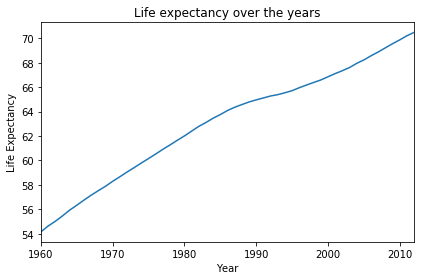

In [11]:
life_melt_group = life_melt.groupby('Year')["Life_Expectancy"].mean()

print(life_melt_group.head())

print(life_melt_group.tail())

life_melt_group.plot()

plt.title('Life expectancy over the years')
plt.ylabel('Life Expectancy')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

#### As we noticed the life expectancy are incremental with the time 

## Verifying Fertility over the years

Year
1960    5.522178
1961    5.515741
1962    5.501364
1963    5.481370
1964    5.451098
Name: Fertility, dtype: float64
Year
2008    2.972792
2009    2.938955
2010    2.909091
2011    2.871383
2012    2.841642
Name: Fertility, dtype: float64


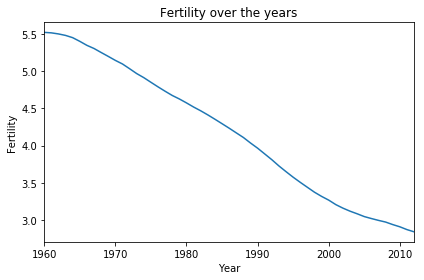

In [12]:
fertility_melt_group = fertility_melt.groupby('Year')["Fertility"].mean()

print(fertility_melt_group.head())

print(fertility_melt_group.tail())

fertility_melt_group.plot()

plt.title('Fertility over the years')
plt.ylabel('Fertility')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

#### The fertility are decrementing over the years , this suggest a negative correlation with life expectancy 

### Verifying the relation between life expectancy and fertility over the years

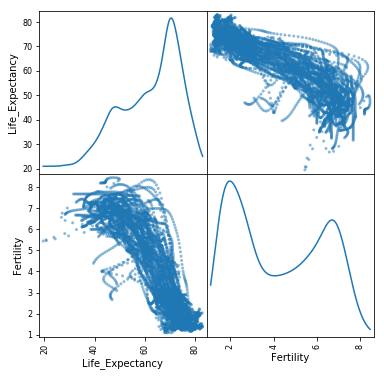

In [13]:
pd.plotting.scatter_matrix(df_merge_region_income[["Life_Expectancy","Fertility"]],marker=".", figsize=(6, 6), diagonal='kde')
plt.show()

#### This confirms the idea that life expectancy and fertility are negative correlated

### Verifying if the correlation is negative in all the regions

#### Obtaining all the regions 

In [14]:
df_merge_region = df_merge_region_income.set_index("Region")
df_merge_region.head()
regions = df_merge_region.index.unique().values
print(regions)

['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Latin America & Caribbean' 'East Asia & Pacific'
 'North America']


#### Displaying the life expectancy and fertility over the years by region, also showing the correlation by region

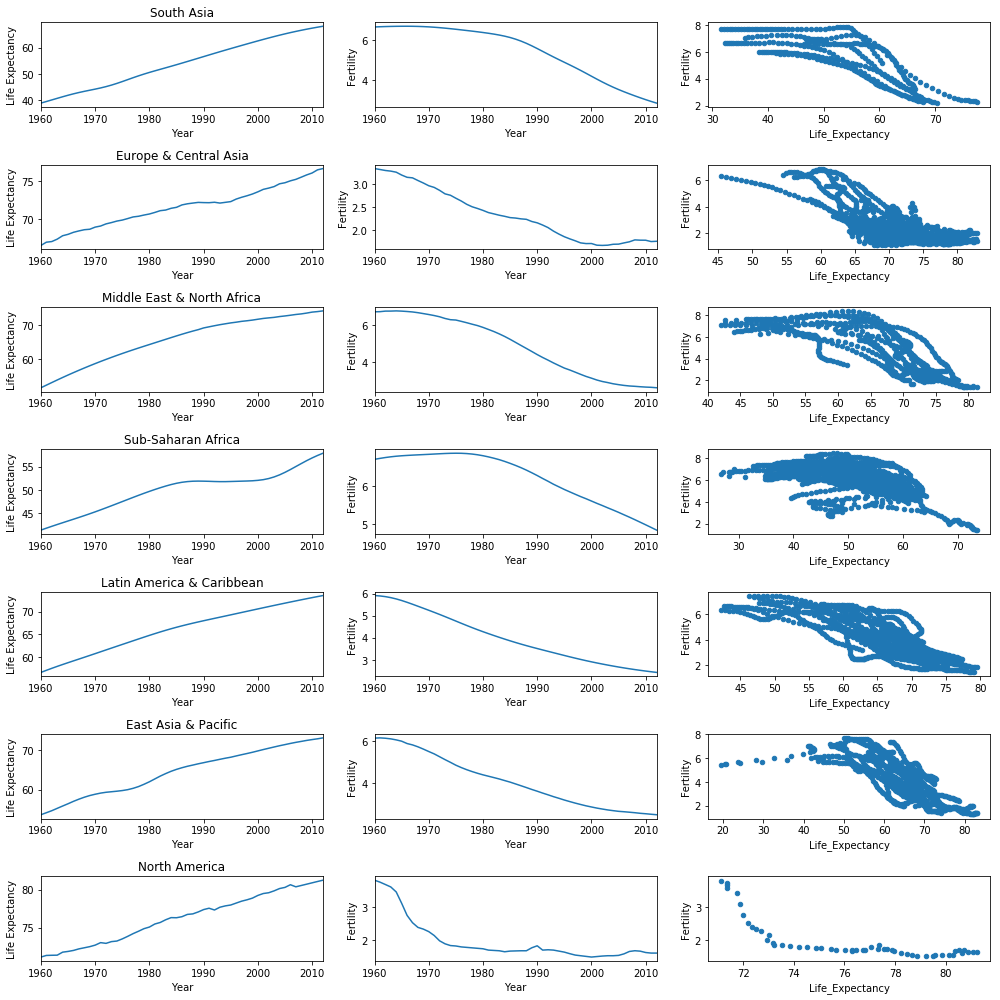

In [15]:
figsize(14, 14)
pos = 0
for r in regions:
    pos = pos + 1
    plt.subplot(7,3,pos)
    plt.title(r)
    #Life expectancy
    group = df_merge_region.loc[r].groupby('Year')["Life_Expectancy"].mean()
    group.plot()
    plt.ylabel('Life Expectancy')
    plt.xlabel('Year')
    pos = pos + 1
    ax = plt.subplot(7,3,pos)
    #Fertility
    group = df_merge_region.loc[r].groupby('Year')["Fertility"].mean()
    group.plot()
    plt.ylabel('Fertility')
    plt.xlabel('Year')
    pos = pos + 1
    ax= plt.subplot(7,3,pos)
    #correlation
    df_merge_region.loc[r].plot(x="Life_Expectancy",y="Fertility",kind="scatter",ax=ax)  
plt.tight_layout()
plt.show()

#### As we can see the life expectancy- fertility relation is stable from 20-60 years but passing this threshold, the fertility starts an aggresive decrementing, we could check this specially in North America and Europe

## Verifying if the correlation is negative in all the incomes types

#### Obtaining all the incomes types

In [16]:
df_merge_income = df_merge_region_income.set_index("IncomeGroup")
df_merge_income.head()
incomes = df_merge_income.index.unique().values
print(incomes)

['Low income' 'Upper middle income' 'Lower middle income' 'High income']


### Displaying the life expectancy and fertility over the years by incomes types, also showing the correlation by incomes

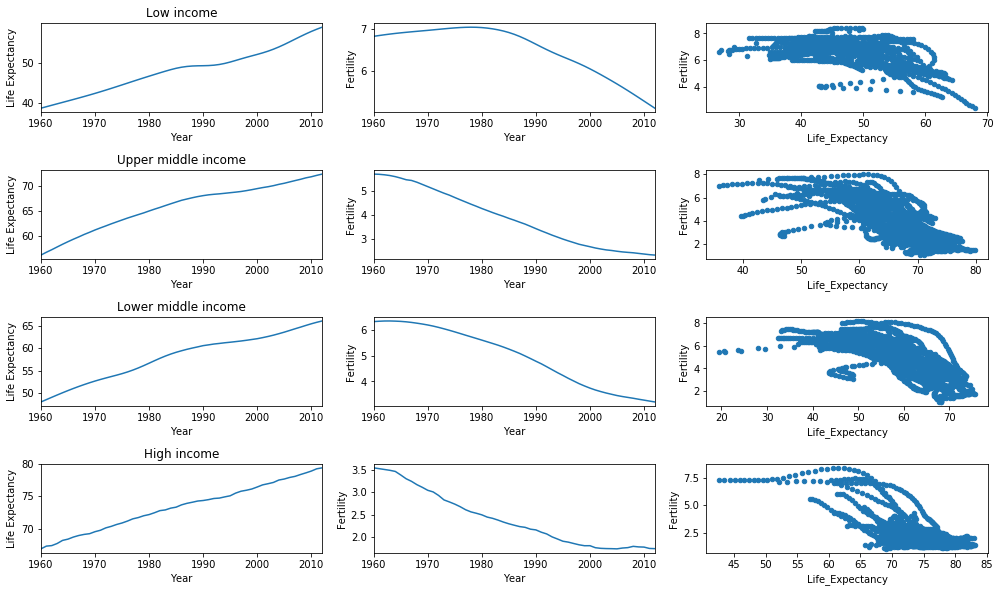

In [17]:
pos = 0
for r in incomes:
    pos = pos + 1
    plt.subplot(7,3,pos)
    plt.title(r)
    #Life expectancy
    group = df_merge_income.loc[r].groupby('Year')["Life_Expectancy"].mean()
    group.plot()
    plt.ylabel('Life Expectancy')
    plt.xlabel('Year')
    pos = pos + 1
    ax = plt.subplot(7,3,pos)
    #Fertility
    group = df_merge_income.loc[r].groupby('Year')["Fertility"].mean()
    group.plot()
    plt.ylabel('Fertility')
    plt.xlabel('Year')
    pos = pos + 1
    ax= plt.subplot(7,3,pos)
    #Correlations
    df_merge_income.loc[r].plot(x="Life_Expectancy",y="Fertility",kind="scatter",ax=ax)  
plt.tight_layout()
plt.show()

#### As we can see the relations between life expectancy and fertility with the incomes types keeps the same behaviour like with regions. Here we can noticed that when the incomes increases, its reflecs in the increases of the life expectancy and the consecutive decrement of the fertility, again with the threshold of 60 years

### Verifying  Central Tendency measures by regions

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


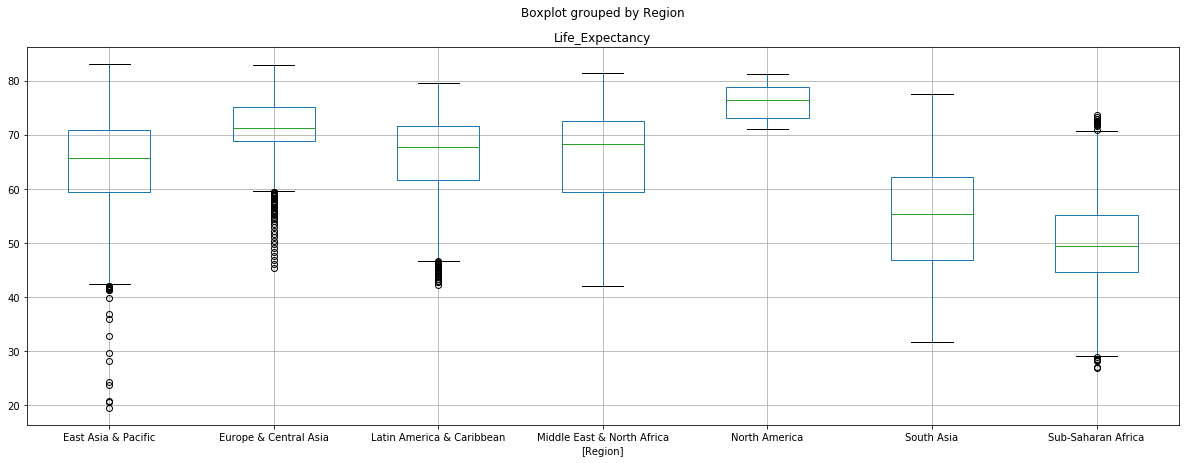

In [18]:
figsize(20, 7)
df_merge_region.boxplot(column=['Life_Expectancy'], by=['Region'])
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


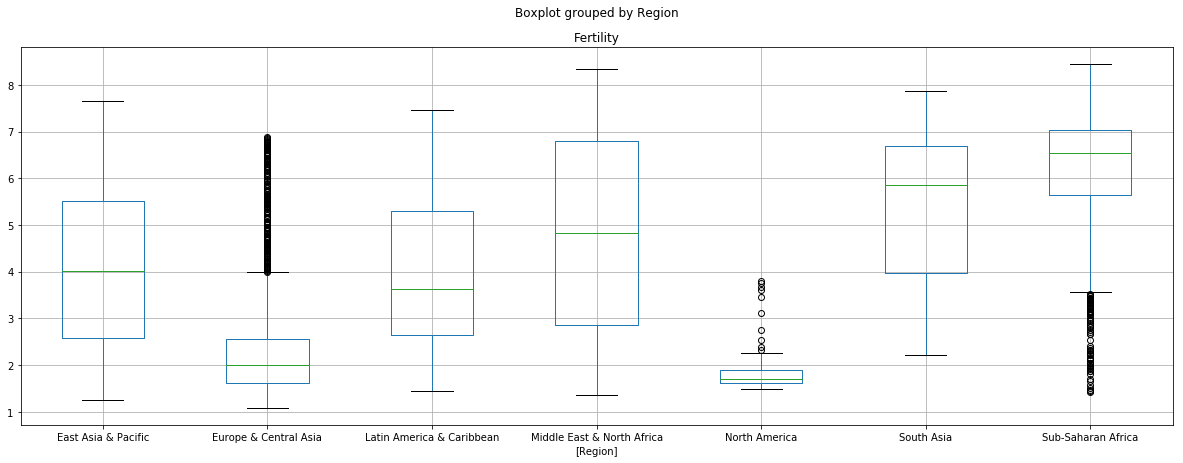

In [19]:
df_merge_region.boxplot(column=['Fertility'], by=['Region'])
plt.show()

#### Apparently the most stable region is North America, in the opposite, Asia and Africa suffers by outliers,this could be explain because some countries of this regions are rich and others poor, for example in Africa the diferences between South Africa and somalia are too bigger

# Verifying which group(region or income) affect more the relation fertility-life expectancy

###  Creating  a  7 centroids  knn cluster (simulating the 7 regions) 

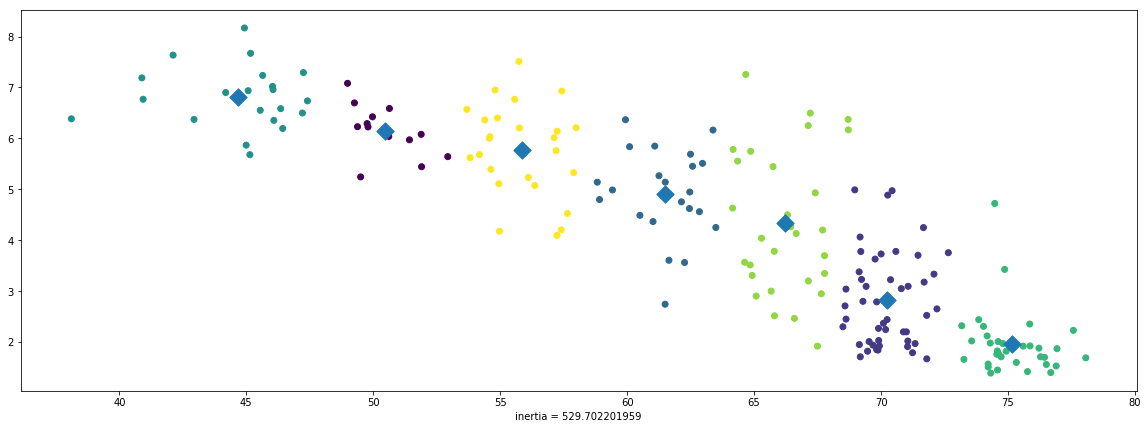

In [20]:
model = KMeans(n_clusters=7)
model.fit(merge_life_fertility_groups)
labels = model.predict(merge_life_fertility_groups)
x = merge_life_fertility_groups.mLife.tolist()
y = merge_life_fertility_groups.mFertility.tolist()
centroids= model.cluster_centers_
xc = centroids[:,0]
yc = centroids[:,1]
plt.scatter(x,y,c=labels)
plt.scatter(xc,yc,marker='D',s=150)
plt.xlabel("inertia = " + str(model.inertia_))
plt.show()


###  Creating  a  4 centroids  knn cluster (simulating the 4 incomes) 

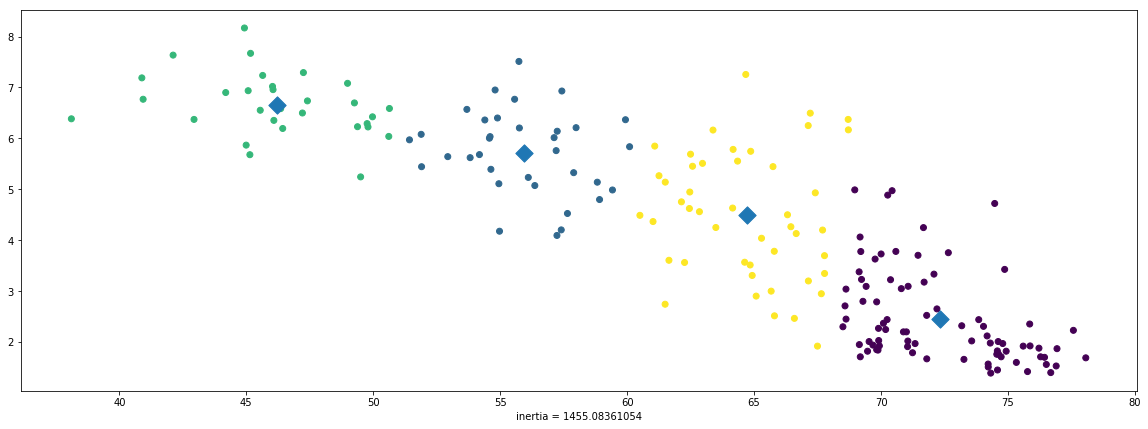

In [21]:
model = KMeans(n_clusters=4)
model.fit(merge_life_fertility_groups)
labels = model.predict(merge_life_fertility_groups)
x = merge_life_fertility_groups.mLife.tolist()
y = merge_life_fertility_groups.mFertility.tolist()
centroids= model.cluster_centers_
xc = centroids[:,0]
yc = centroids[:,1]
plt.scatter(x,y,c=labels)
plt.scatter(xc,yc,marker='D',s=150)
plt.xlabel("inertia = " + str(model.inertia_))
plt.show()

### The cluster that obtains a better inertia was the 7 centroid, now we create a hierarchical cluster and determine which distance could provide us similar number of clusters

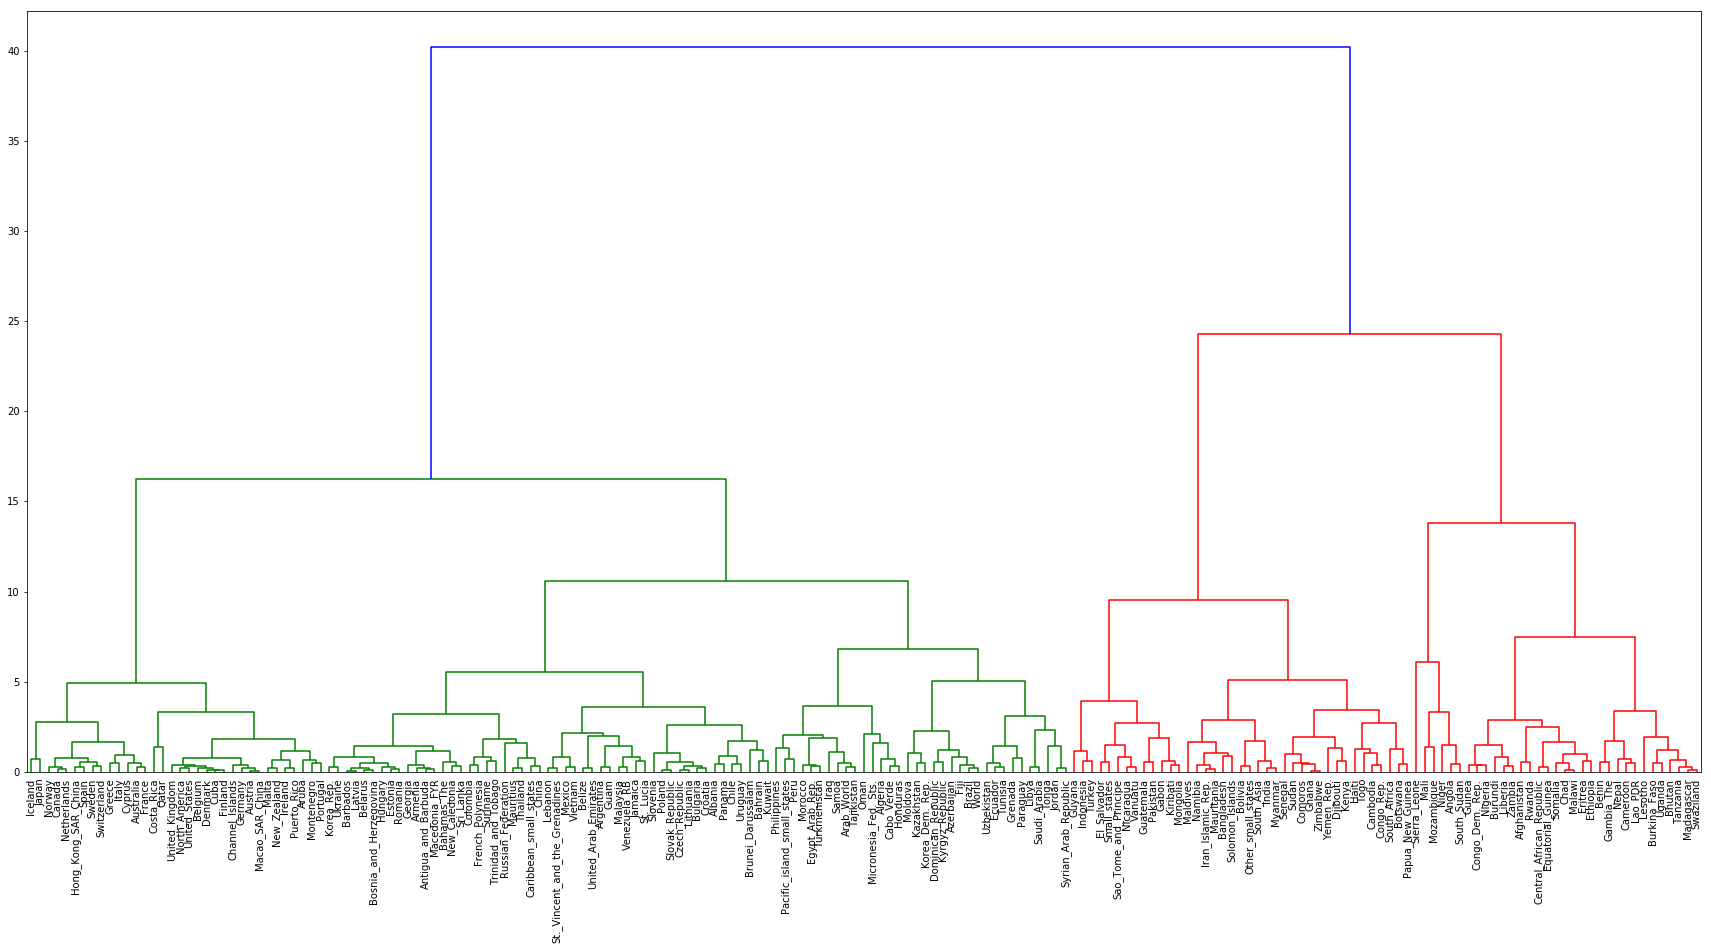

In [22]:
figsize(30, 14)
mergin = linkage(merge_life_fertility_groups,method='complete')
dendrogram(mergin,labels=merge_life_fertility_groups.index,leaf_font_size=10)
plt.show()

In [23]:
labels = fcluster(mergin, 9, criterion='distance')
df_life_fertility_cluster = pd.DataFrame({'Cluster': labels, 'Country_Name': merge_life_fertility_groups.index})
df_life_fertility_cluster.sort_values('Cluster',inplace=True)
df_merge_clusterRegion = pd.merge(df_life_fertility_cluster,metadata,left_on=["Country_Name"], right_on=["TableName"])
del df_merge_clusterRegion["TableName"]
df_merge_clusterRegion.set_index("Cluster",inplace=True)
print(df_merge_clusterRegion.index.unique())

Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name='Cluster')


#### As we can see with a distance of 9 we have been able to obtain the exact number of desired clusters (7) 

## Now is time to analyze the information provided by the hierarchical clustering

### The next table shows the joining info between the hierarchical clustering and the data provided by the metadata

In [24]:
print(df_merge_clusterRegion.head())  

        Country_Name Country Code                 Region  IncomeGroup
Cluster                                                              
1             France          FRA  Europe & Central Asia  High income
1             Canada          CAN          North America  High income
1              Japan          JPN    East Asia & Pacific  High income
1              Italy          ITA  Europe & Central Asia  High income
1            Ireland          IRL  Europe & Central Asia  High income


### Grouping the info by income 

In [25]:
region_cluster = df_merge_clusterRegion.groupby(['Cluster','Region']).count()
income_cluster = df_merge_clusterRegion.groupby(['Cluster','IncomeGroup']).count()
del income_cluster["Country_Name"]
del income_cluster["Country Code"]
income_cluster.columns = ["Members"]
del region_cluster["Country_Name"]
del region_cluster["Country Code"]
region_cluster.columns = ["Members"]
print(income_cluster)

                             Members
Cluster IncomeGroup                 
1       High income               23
        Upper middle income        2
2       High income               12
        Lower middle income        4
        Upper middle income       17
3       High income                1
        Lower middle income        8
        Upper middle income       14
4       Lower middle income        7
        Upper middle income        3
5       Low income                 5
        Lower middle income       10
        Upper middle income        3
6       Low income                 3
        Lower middle income        1
7       Low income                15
        Lower middle income        6


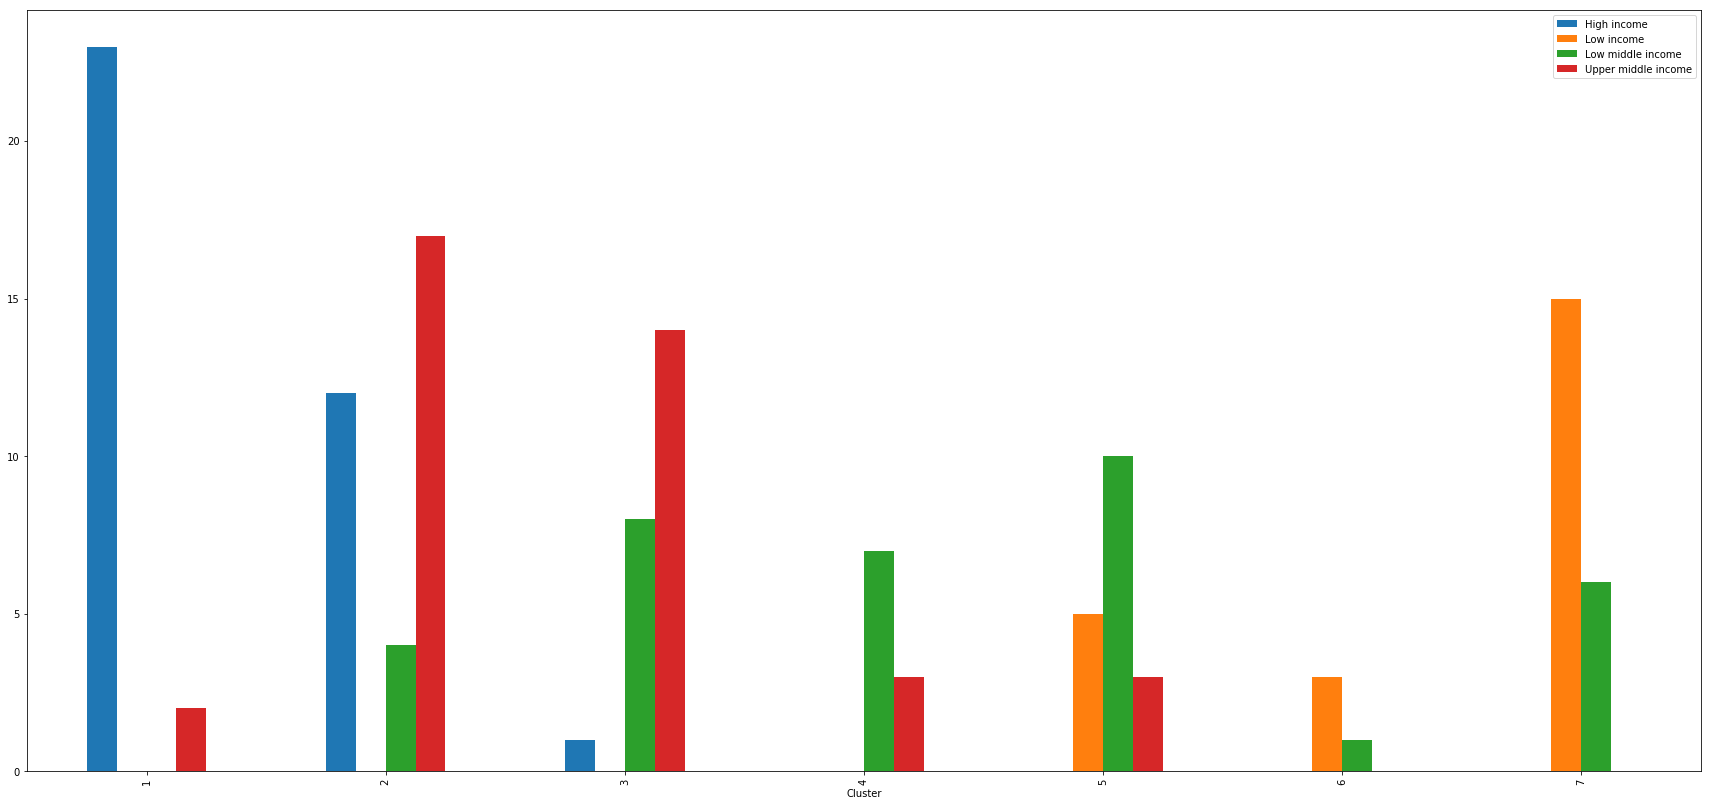

In [26]:
ax = income_cluster.unstack().plot.bar()
handles, labels = ax.get_legend_handles_labels()
ax.legend(["High income","Low income","Low middle income","Upper middle income"])
plt.show()

### Grouping the info by Region

In [27]:
print(region_cluster)

                                    Members
Cluster Region                             
1       East Asia & Pacific               2
        Europe & Central Asia            18
        Latin America & Caribbean         2
        Middle East & North Africa        2
        North America                     1
2       East Asia & Pacific               5
        Europe & Central Asia            14
        Latin America & Caribbean        10
        Middle East & North Africa        3
        Sub-Saharan Africa                1
3       East Asia & Pacific               4
        Europe & Central Asia             6
        Latin America & Caribbean         6
        Middle East & North Africa        7
4       East Asia & Pacific               4
        Europe & Central Asia             1
        Latin America & Caribbean         3
        South Asia                        1
        Sub-Saharan Africa                1
5       East Asia & Pacific               2
        Latin America & Caribbea

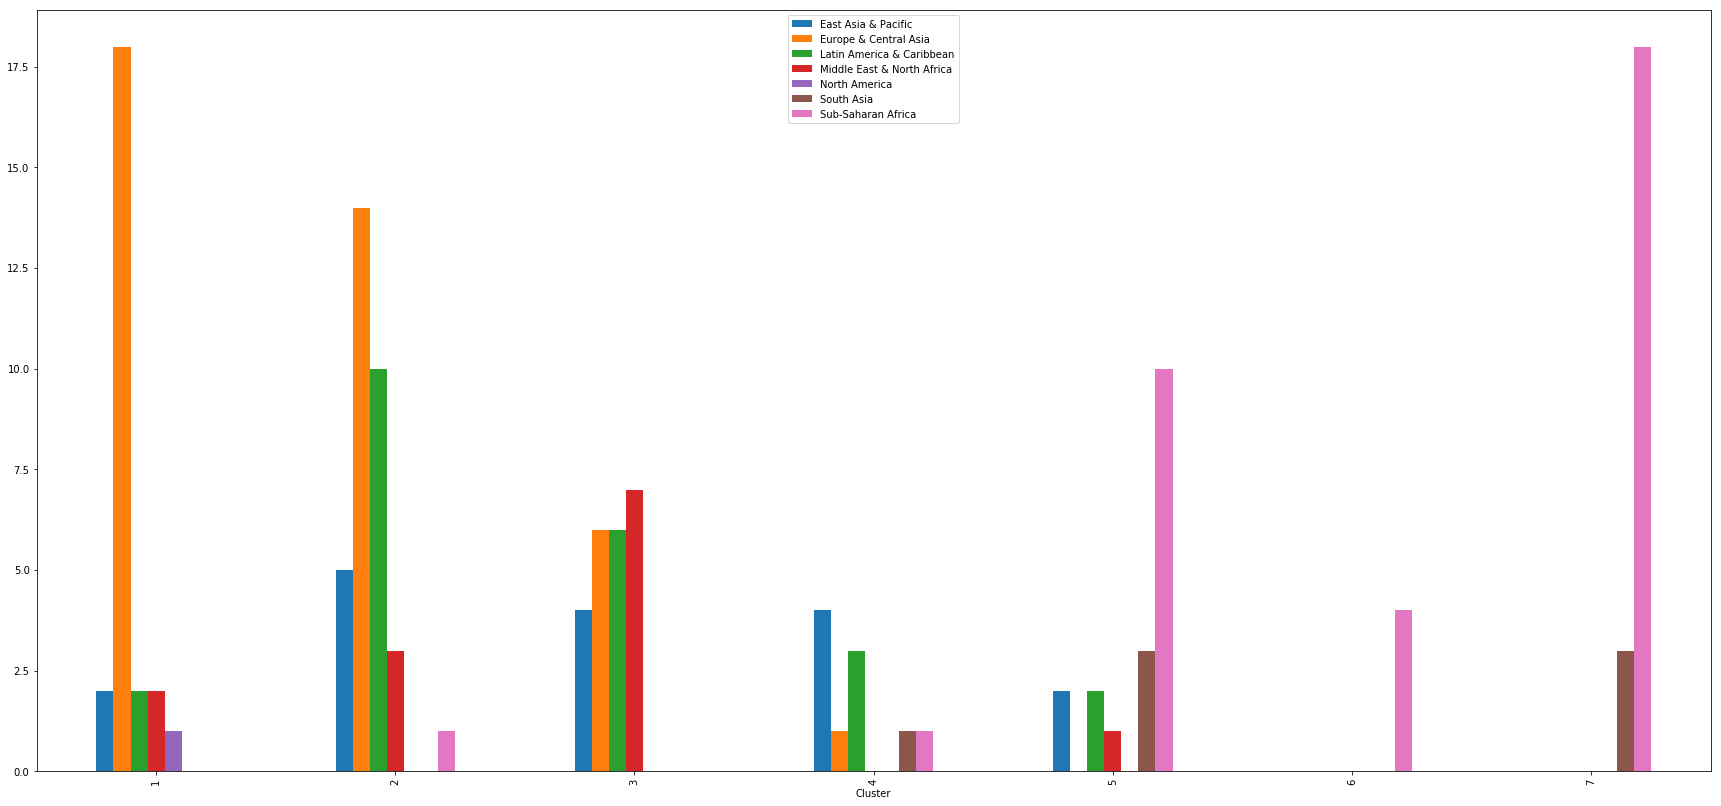

In [28]:
ax = region_cluster.unstack().plot.bar()
handles, labels = ax.get_legend_handles_labels()
ax.legend(['East Asia & Pacific','Europe & Central Asia','Latin America & Caribbean', 'Middle East & North Africa','North America','South Asia','Sub-Saharan Africa'])
plt.show()

# Interpretations :
<ul>
<li>We can group the cluster 6 and 7 into one  because they are affected in the same manner by the region and the income (Sub-Saharan Africa, South Asia)(Low income,Lower middle income).</li>
<li>The clusters 1 and 4  explain better its fertility-life relation for its incomes that for its regions.</li>
<li>Both, regions and incomes can explain in certain way the relation fertility - life expectancy, this is possible because some regions has a clearly determine kind of income, for example the mayority of the countries of africa has low incomes in comparision with europe</li>
<li>When the income increase, the fertility suffer a decrease and the life expectancy increase</li>
<li>When the income decrease, the fertility suffer an increment and the life expectancy decrease</li>
<li>Based of this results apparently is more important the incomes , that is to say, the relation between fertility-life expectancy by region is just explained by the incomes of the region</li>
</ul>

### Finally I show the top 20 countries ordered by life expectancy and fertility (here the data was normalized) 

#### By Max Agrupation

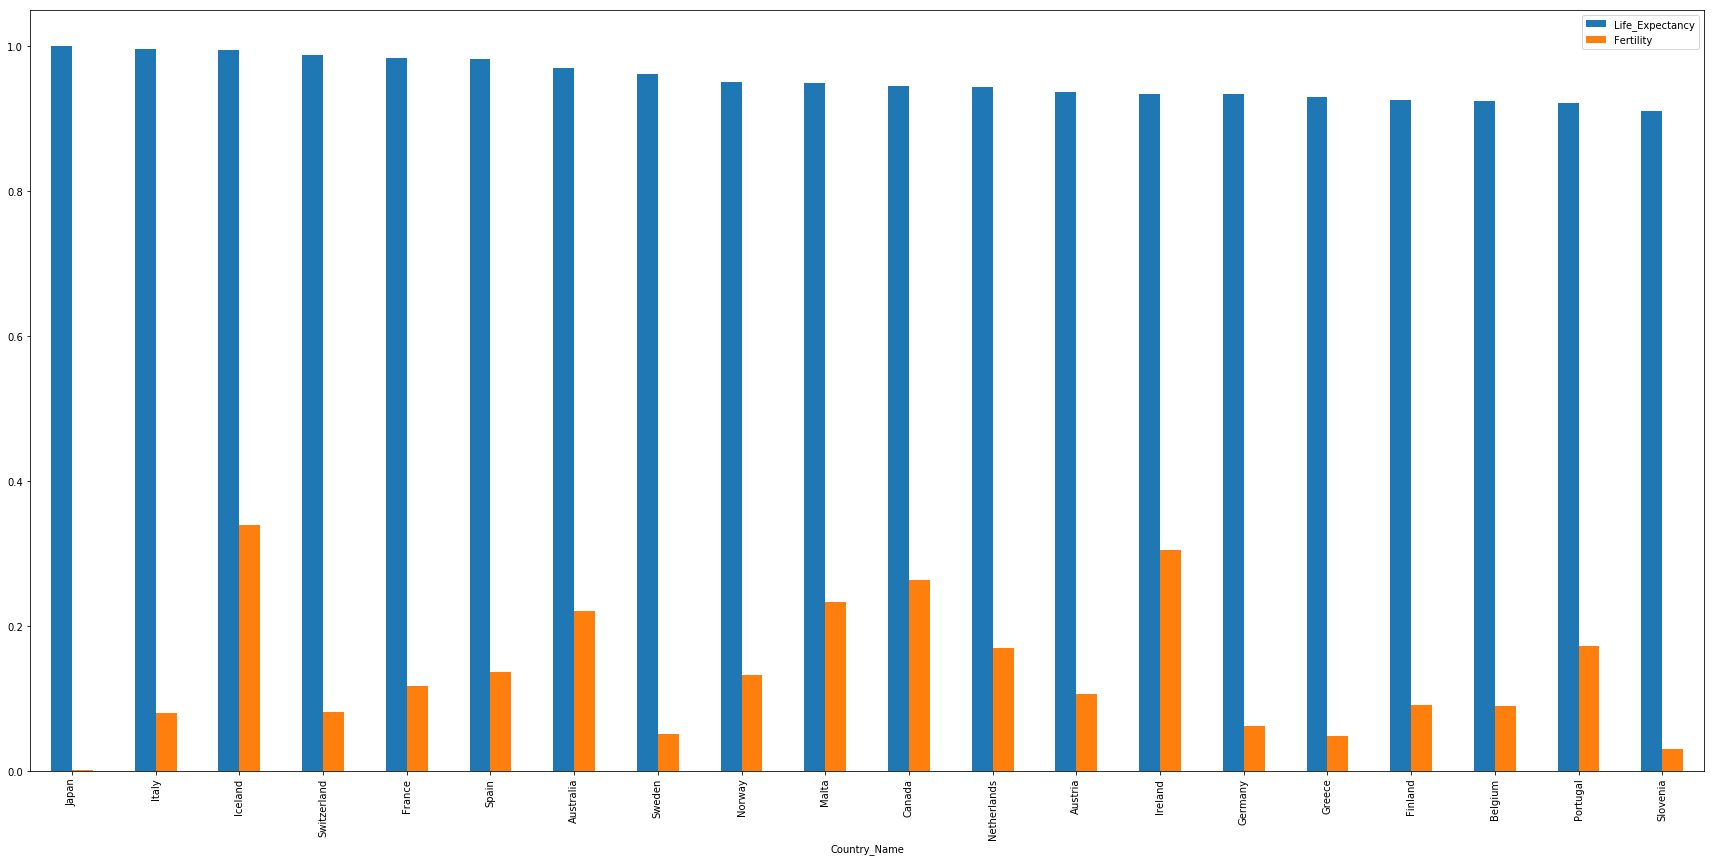

In [29]:
group = df_merge_region_income.groupby(['Country_Name'])["Life_Expectancy","Fertility"].max()
a = group.sort_values(by="Life_Expectancy", ascending=False)
scaler = MinMaxScaler()
a.loc[:,'Life_Expectancy':'Fertility'] = scaler.fit_transform(a.loc[:,'Life_Expectancy':'Fertility'])
a.head(20).plot(kind="bar")
plt.show()

### Plotting life expectancy and fertility into one single dimension

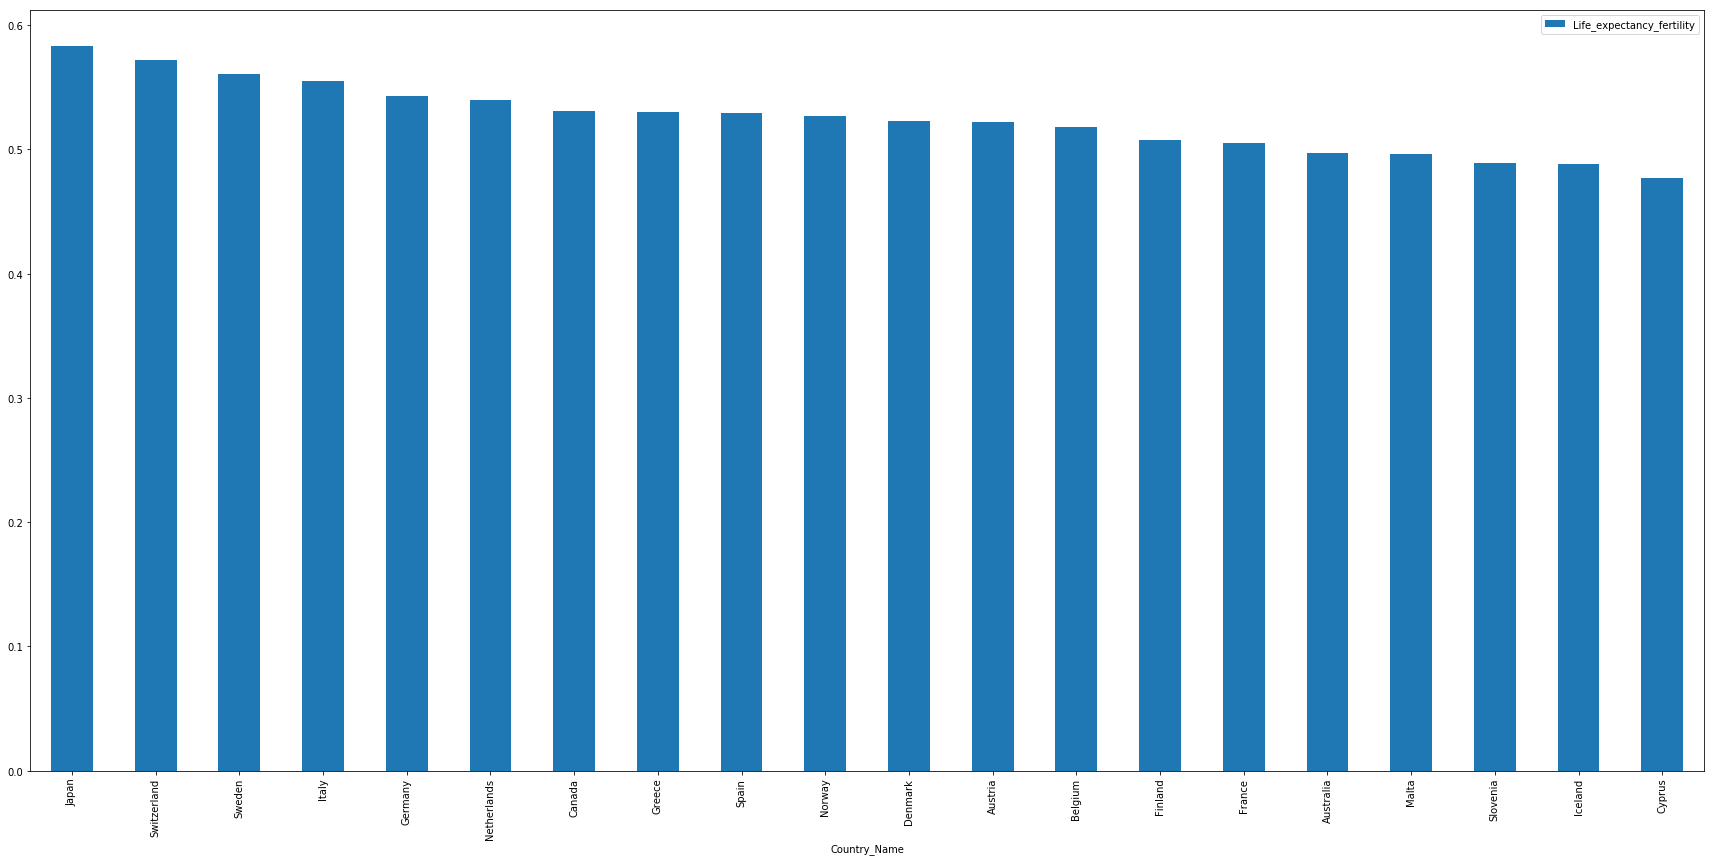

In [30]:
group = df_merge_region_income.groupby(['Country_Name'])["Life_Expectancy","Fertility"].mean()
a = group.sort_values(by="Life_Expectancy", ascending=False)
scaler = MinMaxScaler()
a.loc[:,'Life_Expectancy':'Fertility'] = scaler.fit_transform(a.loc[:,'Life_Expectancy':'Fertility'])
data_pca = a.loc[:,["Life_Expectancy","Fertility"]]
pca = PCA(n_components = 1)
df = pca.fit(data_pca)
a["Life_expectancy_fertility"] = pca.transform(data_pca)* -1
a.loc[:,["Life_expectancy_fertility"]].sort_values(by="Life_expectancy_fertility", ascending=False).head(20).plot(kind="bar")
plt.show()

#### The countries displaying in the graph above will have the most establish growing in the future (which not mean that will have the most population) 

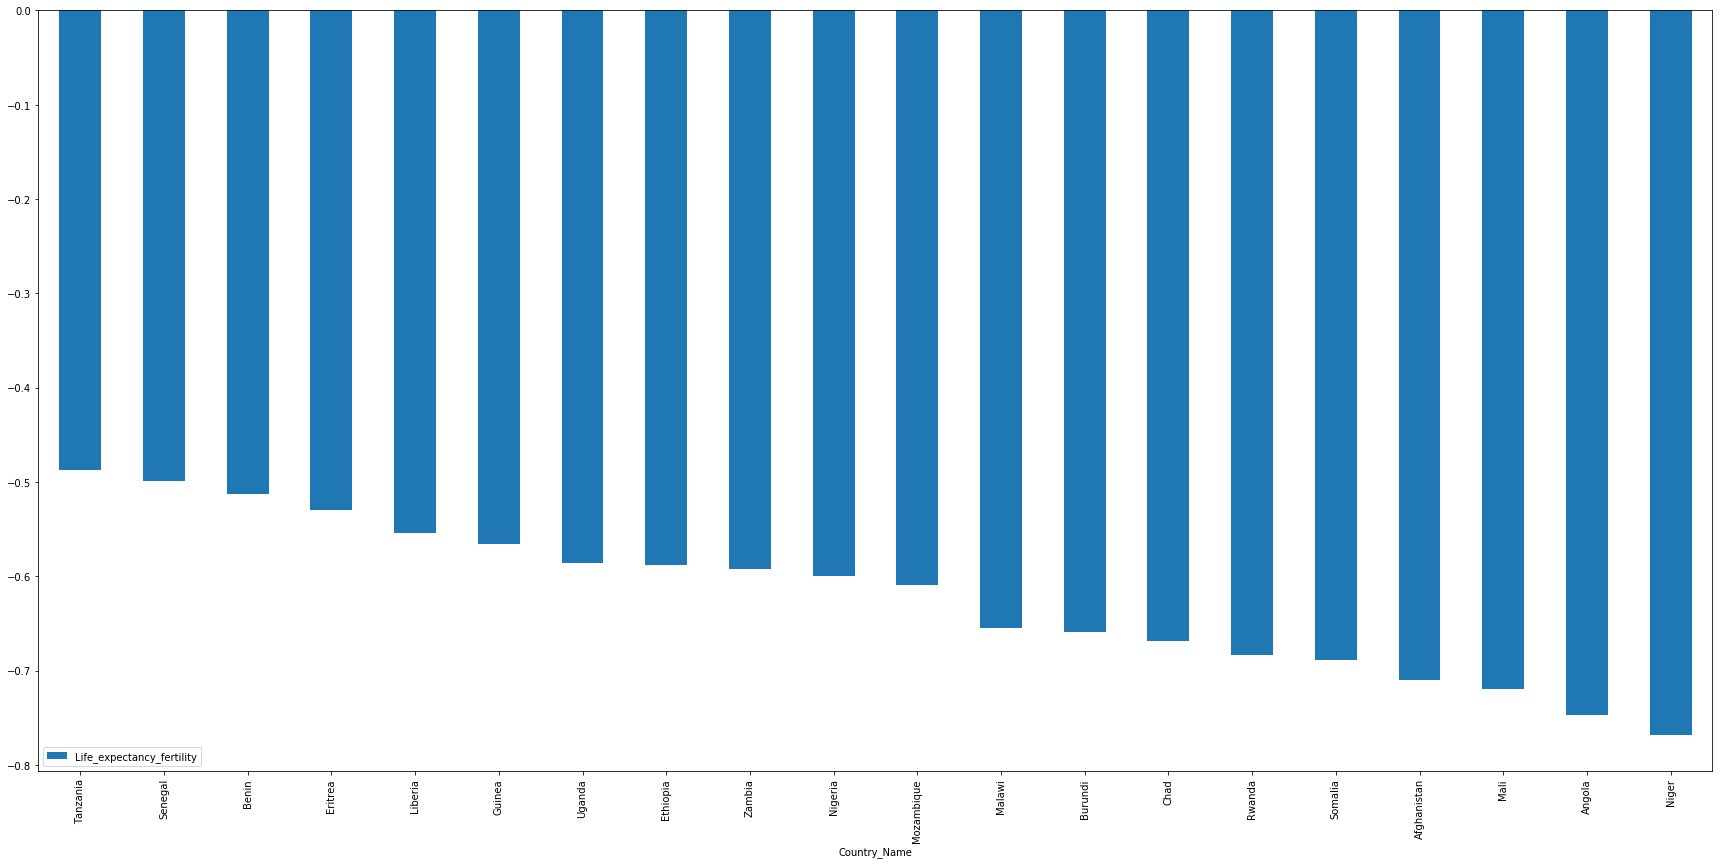

In [31]:
a.loc[:,["Life_expectancy_fertility"]].sort_values(by="Life_expectancy_fertility", ascending=False).tail(20).plot(kind="bar")
plt.show()

#### In the other side the countries showing above will have apparently a negative growing in the future

### The chart below shows the countries that are located in the 75% percentile, this location means that this countries will have a better growing population because they combines  a  good fertility rate with a high life expectancy. Notice the case of France , this country has a high life expectancy (between 75-80 years) but its fertility technically does not have variation over the years and keeping in a good rate up to 2

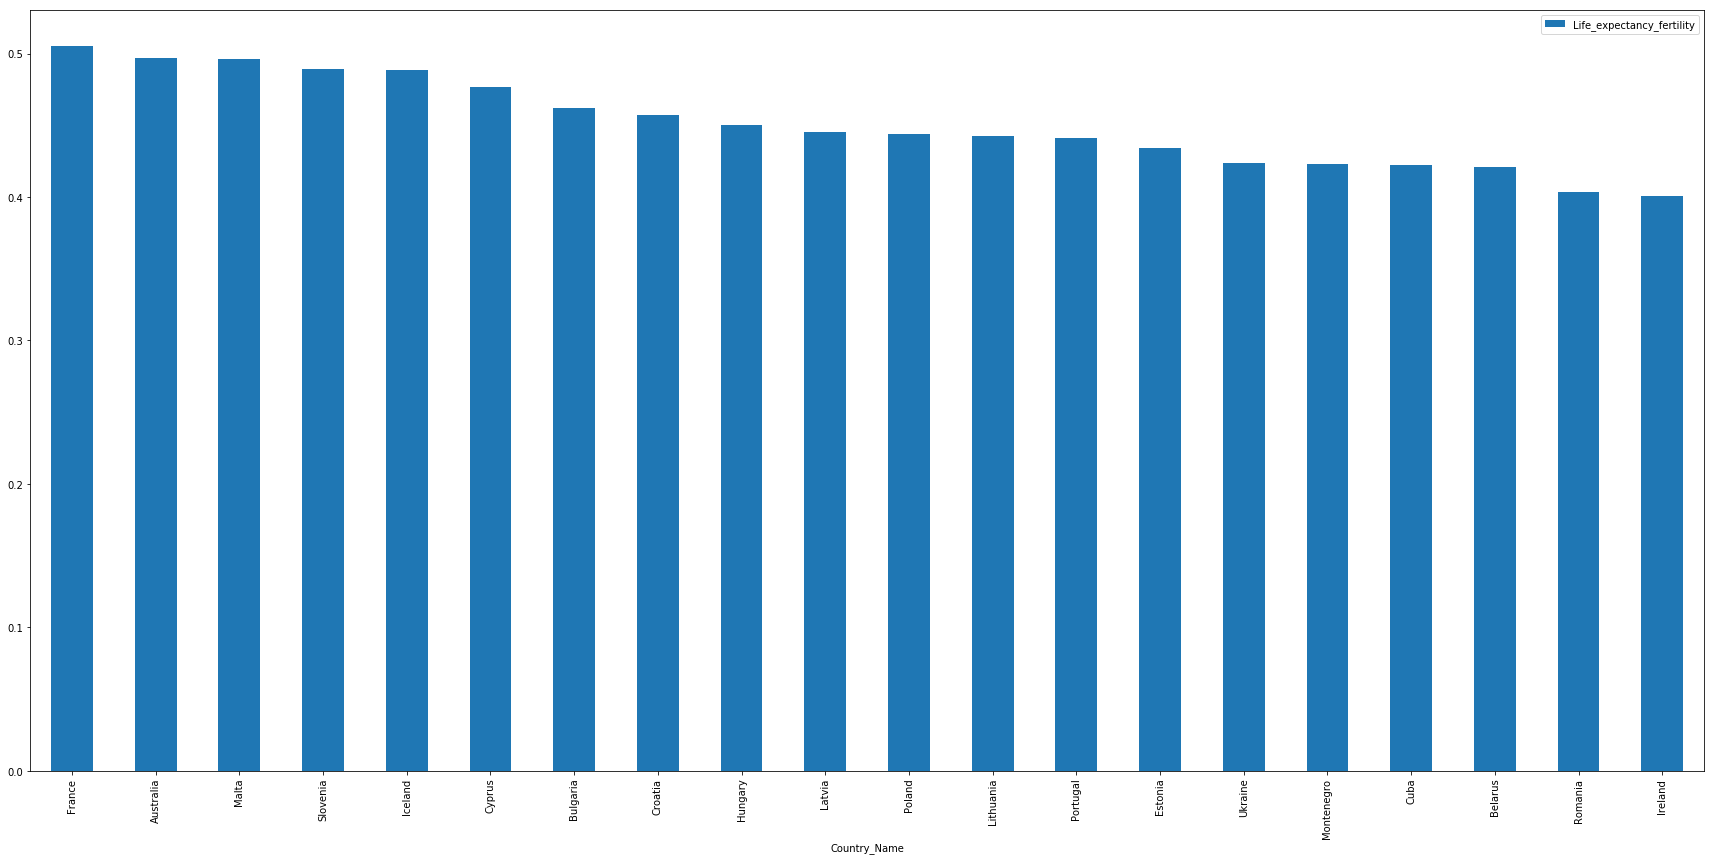

,Life_expectancy_fertility
Country_Name,
France,0.505172
Australia,0.496801
Malta,0.495988
Slovenia,0.488981
Iceland,0.488418
Cyprus,0.476926
Bulgaria,0.462024
Croatia,0.456821
Hungary,0.450012


In [32]:
p = a["Life_expectancy_fertility"].quantile(0.75)
percentile = a[a["Life_expectancy_fertility"] > p]
percentile.loc[:,["Life_expectancy_fertility"]].sort_values(by="Life_expectancy_fertility", ascending=False).tail(20).plot(kind="bar")
plt.show()
percentile.loc[:,["Life_expectancy_fertility"]].sort_values(by="Life_expectancy_fertility", ascending=False).tail(20)

### Here the same data but with life expectancy and fertility normalized


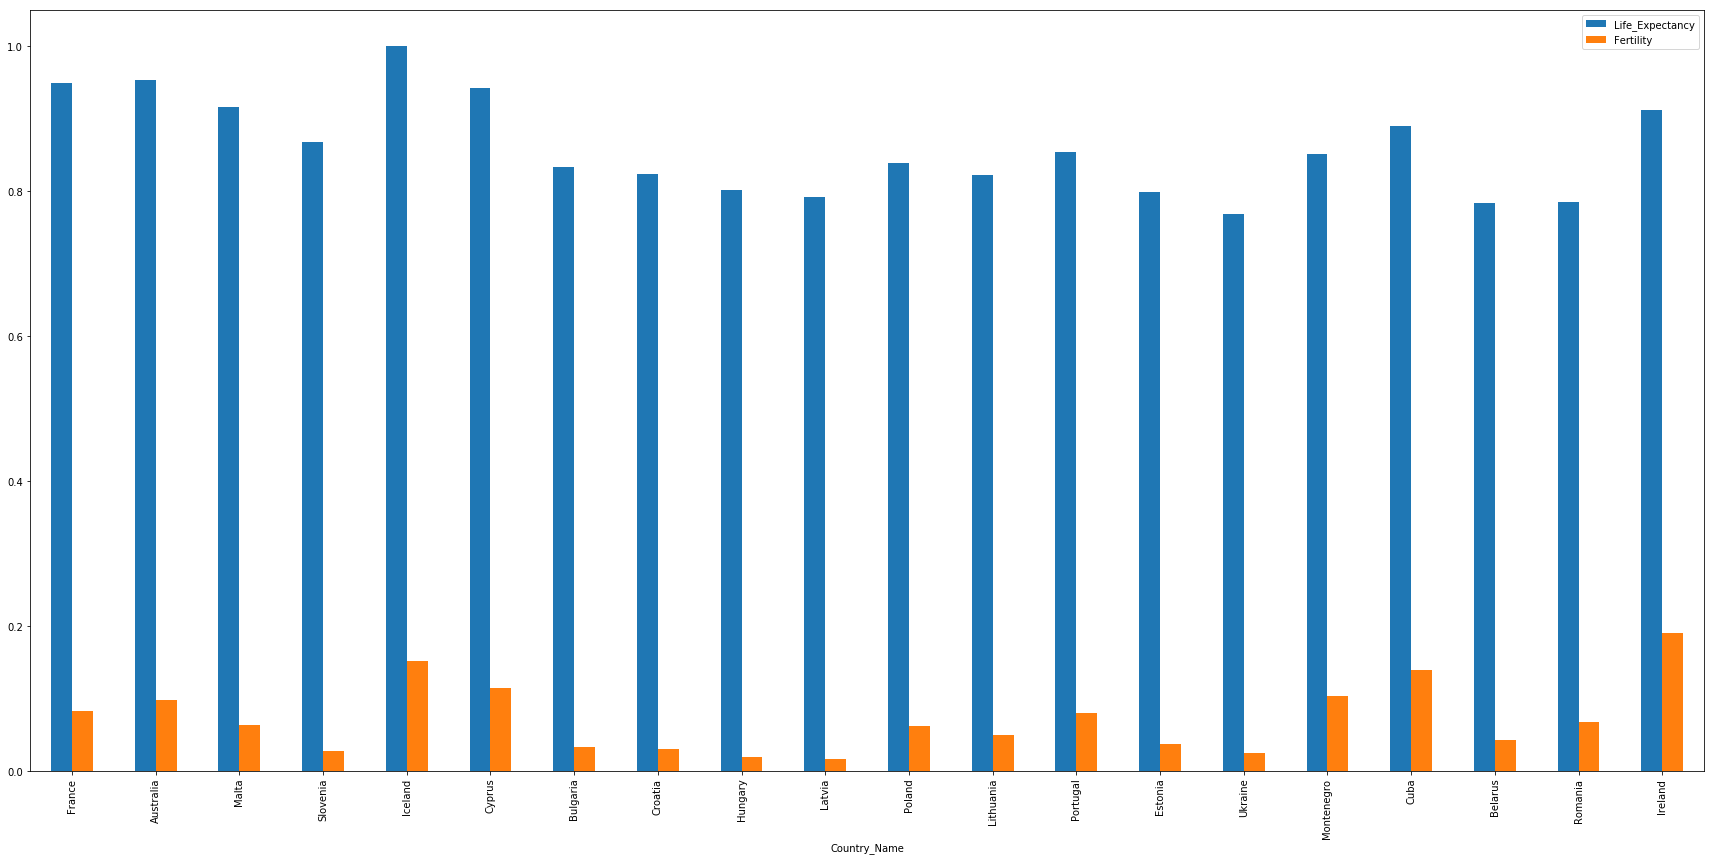

In [33]:
percentile = a[a["Life_expectancy_fertility"] > p]
percentile.sort_values(by=["Life_expectancy_fertility"], 
                       ascending=False).tail(20).loc[:,["Life_Expectancy","Fertility"]].plot(kind="bar")
plt.show()

### Creating a process that tries to determine under the same conditions whicht country will have more population in 50 years. Approximately 26.3% of the global population is aged under 15, while 65.9% is aged 15–64 and 7.9% is aged 65 or over.[67] The median age of the world's population was estimated to be 29.7 years in 2014,[69] and is expected to rise to 37.9 years by 2050


In [34]:
#merge_life_fertility_groups["Population=15"] = 262
for age in range(1,15):
    merge_life_fertility_groups[str(age)] = 17
merge_life_fertility_groups["15"] = 24   
#merge_life_fertility_groups["Population=30"] = 659
for age in range(16,64):
    merge_life_fertility_groups[str(age)] = 13
merge_life_fertility_groups["64"] = 48
#merge_life_fertility_groups["Population=65"] = 79
for age in range(65,81):
    merge_life_fertility_groups[str(age)] = 5
merge_life_fertility_groups["81"] = 4
merge_life_fertility_groups.head()


,mLife,mFertility,1,2,3,4,5,6,7,8,...,72,73,74,75,76,77,78,79,80,81
Country_Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,45.168805,7.671,17,17,17,17,17,17,17,17,...,5,5,5,5,5,5,5,5,5,4
Albania,71.697561,3.177,17,17,17,17,17,17,17,17,...,5,5,5,5,5,5,5,5,5,4
Algeria,64.867220,5.747,17,17,17,17,17,17,17,17,...,5,5,5,5,5,5,5,5,5,4
Angola,40.887488,7.189,17,17,17,17,17,17,17,17,...,5,5,5,5,5,5,5,5,5,4
Antigua_and_Barbuda,70.182561,2.246,17,17,17,17,17,17,17,17,...,5,5,5,5,5,5,5,5,5,4


In [35]:
def LifeRuning(row):
    #increasing population
    suma = 0
    fertilityrange = 32.0
    for age in range(2,82):
        _ageposition = age + 2
        merge_life_fertility_groups.loc[row.Index, str(age)] =  row[_ageposition-1]
        if age >= 13 and age <=45:
            suma = suma + row[_ageposition]
            
    merge_life_fertility_groups.loc[row.Index, '1'] = ((fertilityrange/ row[2] )/ 100.0) * suma  
    #decresing population, here i take the desition to no considered death less that the median death
    #causes by weird circunstances, remember is a really simple experiment here.
    increase = 0
    for age in range(1,82):
        if age >= row[1]:
            increase = increase + 1
            if row[_ageposition] >= 1:
                merge_life_fertility_groups.loc[row.Index, str(age)]  = row[_ageposition] - (((row[1] + increase) / 100.0) * row[_ageposition])
            else:
                merge_life_fertility_groups.loc[row.Index, str(age)] = 0

for i in range(80):
    for row in merge_life_fertility_groups.itertuples():
        LifeRuning(row)
   
merge_life_fertility_groups.head()


,mLife,mFertility,1,2,3,4,5,6,7,8,...,72,73,74,75,76,77,78,79,80,81
Country_Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,45.168805,7.671,44.329861,43.832948,43.343923,42.863152,42.403171,41.945180,41.489506,41.036459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,71.697561,3.177,1059.043194,1012.828679,968.577708,926.218776,885.759073,847.030408,809.982996,774.573483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,64.867220,5.747,120.596468,117.985959,115.433539,112.939528,110.526044,108.159486,105.840435,103.569545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,40.887488,7.189,34.215511,33.928743,33.641903,33.355601,33.070417,32.786907,32.505600,32.226996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Antigua_and_Barbuda,70.182561,2.246,4087.098671,3854.204594,3634.263532,3426.578258,3230.660266,3045.718045,2871.241952,2706.777528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


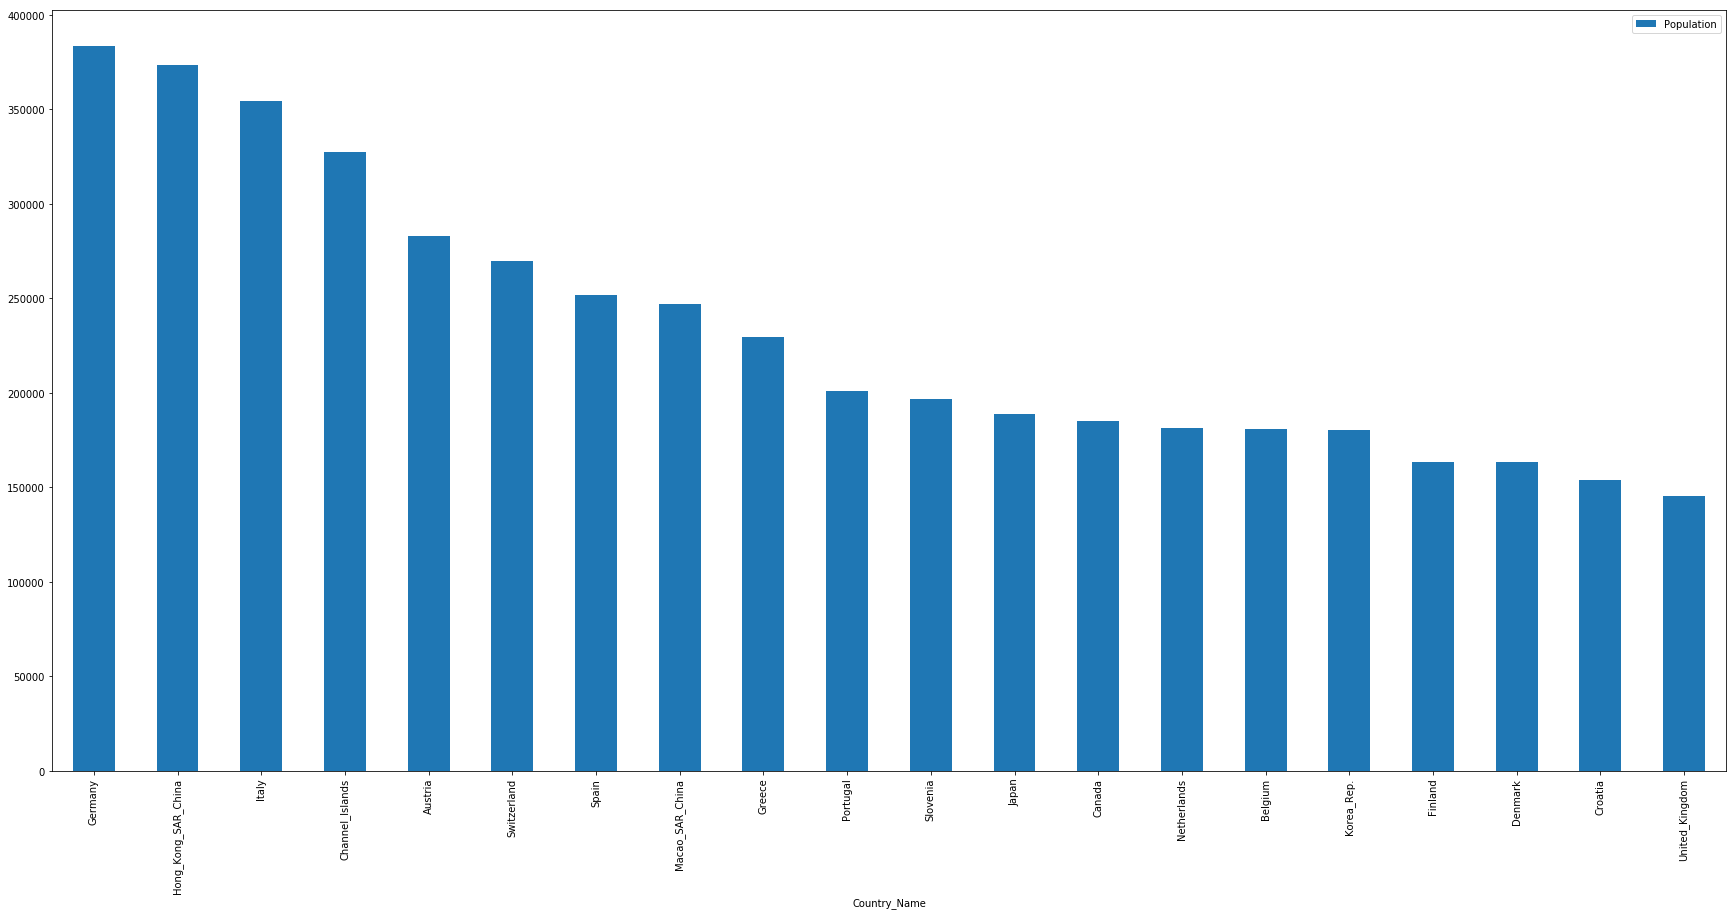

In [36]:
merge_life_fertility_groups["Population"] = merge_life_fertility_groups.apply(lambda row: row['1' : '81'].sum(),axis=1)
merge_life_fertility_groups.sort_values(by=["Population"], ascending=False).head(20).loc[:,["Population"]].plot(kind="bar")
plt.show()

In [37]:
merge_life_fertility_groups.loc[:,["mLife"]].sort_values(by=["mLife"], ascending=False).head(20)


,mLife
Country_Name,
Japan,78.064634
Iceland,77.576585
Sweden,76.931220
Switzerland,76.899024
Hong_Kong_SAR_China,76.685366
Spain,76.510488
Canada,76.440000
Netherlands,76.284634
Norway,76.220488


In [38]:
merge_life_fertility_groups.to_csv("datastudy.csv",sep=",")